<h1>Applied Data Science Coursera Capstone Project</h1>
<h2>Segmentation &amp; Clustering Neighborhoods in Milan</h2>
<h2>The Battle of Neighborhoods - Final Report (Week 2)</h2>
<h2>Roozbeh Dargahi</h2>

### Table of Content

1.	Introduction Section : 
	
    1.1 A description of the problem and a discussion of the background.
    
    1.2 Problem to be resolved
    
    1.3 Audience for this project.
    
    
2.	Data Section:  

	2.1 Data Required to resolve the problem
    
    2.2 Data sources and data manipulation
    
    2.3 How the data will be used to solve the problem
    
    
3.	Methodology section : 

	3.1 Process steps and strategy to resolve the problem
    
    3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.
    
    
4.	Results section 

	Discussion of the results and how they help to take a decision.
    
    
5.	Discussion section 

	Elaboration and discussion on any observations and/or recommendations for improvement.
    
    
6.	Conclusion section 

	Desicison taken and Report Conclusion.

# 1. Introduction Section: 
### Discussion of the business problem and the audience who would be interested in this project.

### 1.1 A description of the problem and a discussion of the background.
Italy will host the 2026 Winter Games, the International Olympic Committee (the “IOC”) announced on June 24. 
The IOC, which organizes the Winter and Summer Games, chose a bid from Milan and the Alpine ski resort of Cortina d’Ampezzo 
over a single rival bid from the Swedish capital of Stockholm and the village of Åre.
The IOC Executive Board and IOC Session adopted a report entitled the “Olympic Games: The New Norm” in February 2018. 
It includes over one hundred practical measures aimed at reducing the cost and complexity of the Olympic and Paralympic Games 
delivery model and covers the entire lifecycle of a Games edition from candidature to organisation and legacy. 
The Host City Contract (HCC)– Principles 2026, is the contract concluded between the IOC and the city elected 
to host the Olympic and Paralympic Games (the “Host City”), the National Olympic Committee of the Host Country (the “Host NOC”) and Organising Committees for the Olympic and Paralympic Games (OCOG).  
The HCC - Operational Requirements document lists key requirements applicable to the planning, organising, financing and 
staging of the Games.

Sufficient, well-located and reasonably priced accommodation allows all Olympic and Paralympic stakeholders 
to fulfill their duties in the period before, during and immediately after the Games. 
For the Accommodation area, key success factors include: 
1. Binding and fair accommodation pricing and availability guarantees for all categories of accommodation;  
2. Strict adherence to accommodation requirements and timetables for various stakeholder groups; and 
3. Close coordination with interdependent areas, including the Arrivals and Departures, Finance and Transport areas and the respective stakeholder organisations outlined in the requirements tables of the HCC. 

### 1.2  Problem to be resolved:   

The "Stakeholder Group Accommodation Requirements Table"  outlines that International Federation (IF) Group should be accommodated to 4 different cluster of hotels based on the quality and level of service to their customers.
The challenge to resolve is being able to find hotels in Milan that offer such a requirement. Therefore, I want to find a hotel subject to the following conditions: 
- Hotel with  ( 2 Stars <=  quality < 4 Stars)
- Unit located within walking distance (<=1.0 km) from a subway metro station in Milan
- Area with most ammenities and venues 

### 1.3 Interested Audience
I believe this is a relevant project for the IOC and other Olympic Movement stakeholders that closely collaborate with the OCOG to identify innovative solutions and customise requirements to better reflect the local context in order to achieve the objectives of the New Norm, i.e. to make the Olympic Games delivery cost-efficient and effective.. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case toward the development of Data Science skills.

# 2. Data Section:
## Description of the data and its sources that will be used to solve the problem

### 2.1 Data Required to resolve the problem
In order to make a good choice of a hotel in Milan, the following data is required:
   - List/Information on neighborhoods form Milan with their Geodata (latitude and longitude).
   - List/Information about the subway metro stations in Milan with geodata.
   - Listed hotels in Milan area with descriptions ( Quality, location, address)
   - Venues and ammenities in the Milan neighborhoods (e.g. top 10)

### 2.2 Sources and manipulation
- The list of Milan neighborhoods will be extracted from Wikipedia Page (https://it.wikipedia.org/wiki/Municipi_di_Milano) using Web Scraping.
- List of accommodation facilities in Milan area with descriptions will be obtained from DatiOpen.it Website (http://www.datiopen.it/it/opendata/Regione_Lombardia_Mappa_delle_strutture_ricettive).
- The Foursquare Platform is the main source to identify any location and find places nearby. 
- The geolocation will be obtained via an algorythm using Nominatim. 

### 2.3 How the data will be used to solve the problem
The data will be used as follows:
- Use Foursquare and geopy data to map top 10 venues for all Milan neighborhoods and clustered in groups.
- Use foursquare and geopy data to map the location of subway metro stations, separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately
- Use Foursquare and geopy data to map the location of hotels, in some form, linked to the subway locations.
- create a map that depicts, for instance, the quality of hotels, around a radious of 1.0 km around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative quality per subway area.
- Addresses from hotel locations will be converted to geodata (lat, long) using Geopy-distance and Nominatim.
- Data will be searched in from DatiOpen.it Website, or other government agencies.

# 3. Methodology section: 

## 3.1 Process steps and strategy to resolve the problem

In this project I will direct my efforts on hotels of Milan which can best satisfy the needs of IOC stakeholder groups outlined in the requirements tables of the HCC, particularly those with most ammenities and venues. I will limit my analysis to hotels ~1 km around subway stations.
In first step I have collected the required data: Get access to full details list of all hotels in Milan (Star Ratings, location, address) through DatiOpen.it Website. The complete list of subyay stations, split by borough, in Milan will be obtained from a Wikipedia page using web scraping. Venues and ammenities in the Milan neighborhoods should be found using  Foursquare API.
Second step in our analysis will be calculation and exploration of 'closest subway station' across different areas of Milan -  and focus the attention on those areas.
In third and final step I will focus on most promising areas and within those create clusters of locations that meet some basic requirements established in HCC. I will take into consideration locations with most ammenities and venues in radius of 500 meters. I will present map of all such locations but also create clusters (using k-means clustering) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final exploration and search for optimal location by IOC.

## 3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.

In [283]:
import pandas as pd
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
import folium
from sklearn.cluster import KMeans
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import re
import geocoder as geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

### Using the BeautifulSoup package for web scraping.

In [3]:
wiki_url = 'https://it.wikipedia.org/wiki/Stazioni_della_metropolitana_di_Milano'
wiki_page = requests.get(wiki_url).text
wiki_doc = BeautifulSoup(wiki_page, 'lxml')

# get the table containing the postal codes
stations_table = wiki_doc.find('table', {'class': 'wikitable sortable'})
stations_table

<table class="wikitable sortable">
<tbody><tr>
<th width="18%">Stazione
</th>
<th width="10%">Linea
</th>
<th width="15%">Città
</th>
<th width="08%">Municipio<sup class="reference" id="cite_ref-ReferenceA_1-0"><a href="#cite_note-ReferenceA-1">[1]</a></sup>
</th>
<th data-sort-type="date" width="18%">Data apertura
</th>
<th width="18%">Tipologia
</th>
<th class="unsortable" width="8%">Interscambi
</th>
<th class="unsortable" width="8%">Note
</th></tr>
<tr bgcolor="#FFFFFF">
<td><a href="/wiki/Abbiategrasso_(metropolitana_di_Milano)" title="Abbiategrasso (metropolitana di Milano)">Abbiategrasso</a></td>
<td><div class="center"><div class="floatnone"><a href="/wiki/Linea_M2_(metropolitana_di_Milano)" title="Linea M2 (metropolitana di Milano)"><img alt="Milano linea M2.svg" data-file-height="147" data-file-width="220" decoding="async" height="20" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Milano_linea_M2.svg/30px-Milano_linea_M2.svg.png" srcset="//upload.wikimedia.org/wikip

In [5]:
def tableDataText(table):       
    rows = []
    trs = table.find_all('tr')
    headerow = [td.get_text(strip=True) for td in trs[0].find_all('th')] # header row
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append([td.get_text(strip=True) for td in tr.find_all('td')]) # data row
    return rows


stations_list_table = tableDataText(stations_table)

In [9]:
# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
stations_df = pd.DataFrame(stations_list_table[1:], columns=stations_list_table[0])
stations_df.columns=[ 'Stazione','Linea','Città','Municipio','Data apertura','Tipologia','Interscambi','Note']
stations_df.head(10)

,Stazione,Linea,Città,Municipio,Data apertura,Tipologia,Interscambi,Note
0,Abbiategrasso,,Milano,Municipio 5,17 marzo2005,sotterranea,,
1,Affori Centro,,Milano,Municipio 9,26 marzo2011,sotterranea,,
2,Affori FN,,Milano,Municipio 9,26 marzo2011,sotterranea,,
3,Amendola,,Milano,Municipio 8,1º novembre1964,sotterranea,,
4,Assago Milanofiori Forum,,Assago,-,20 febbraio2011,in superficie,,
5,Assago Milanofiori Nord,,Assago,-,20 febbraio2011,in superficie,,
6,Bande Nere,,Milano,Municipio 6,18 aprile1975,sotterranea,,
7,Bicocca,,Milano,Municipio 9,10 febbraio2013,sotterranea,,
8,Bignami,,Milano,Municipio 9,10 febbraio2013,sotterranea,,
9,Bisceglie,,Milano,Municipio 6,21 marzo1992,sotterranea,,


In [11]:
stations_df.drop(columns=['Linea', 'Data apertura','Tipologia','Interscambi','Note'], axis=1, inplace=True)
stations_df.head(10)

,Stazione,Città,Municipio
0,Abbiategrasso,Milano,Municipio 5
1,Affori Centro,Milano,Municipio 9
2,Affori FN,Milano,Municipio 9
3,Amendola,Milano,Municipio 8
4,Assago Milanofiori Forum,Assago,-
5,Assago Milanofiori Nord,Assago,-
6,Bande Nere,Milano,Municipio 6
7,Bicocca,Milano,Municipio 9
8,Bignami,Milano,Municipio 9
9,Bisceglie,Milano,Municipio 6


In [12]:
print(stations_df.shape)

(106, 3)


In [13]:
milano_stations_df=stations_df[stations_df['Città']=='Milano']
milano_stations_df.head()

,Stazione,Città,Municipio
0,Abbiategrasso,Milano,Municipio 5
1,Affori Centro,Milano,Municipio 9
2,Affori FN,Milano,Municipio 9
3,Amendola,Milano,Municipio 8
6,Bande Nere,Milano,Municipio 6


In [14]:
print(milano_stations_df.shape)

(86, 3)


In [15]:
milano_stations_df.to_csv('milano_stations.csv')

### Using Nominatim API to find geolocation data.

In [22]:
milano_stations_geospatial = []
for station in milano_stations_df['Stazione']:
    address = '{}, Milano'.format(station)
    geolocator = Nominatim(user_agent="Milano_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    milano_stations_geospatial.append([station, latitude, longitude])
    #print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))
    
milano_stations_geospatial = pd.DataFrame(milano_stations_geospatial)
milano_stations_geospatial.columns=['Stazione','Latitude','Longitude']
milano_stations_geospatial.head()

,Stazione,Latitude,Longitude
0,Abbiategrasso,45.398733,8.916230
1,Affori Centro,45.513554,9.173980
2,Affori FN,45.521673,9.168226
3,Amendola,45.473679,9.150969
4,Bande Nere,45.461504,9.136484


In [37]:
def getLatLong(row):
    #print('post :{}'.format(row[:]))
    #print('neigh :{}'.format(row[1]))
    # initialize your variable to None
    lat_lng_coords = None
    search_query = 'La stazione {}, della metropolitana di Milano'.format(row)
    # loop until you get the coordinates
    try:
        while(lat_lng_coords is None):
            #g = geocoder.here(search_query,app_id=app_id,app_code=app_code)
            g = geocoder.arcgis(search_query)
            lat_lng_coords = g.latlng
            #print('FIRST')
    except IndexError:
        latitude = 0.0
        longitude = 0.0
        print('BACKUP')
        return [latitude,longitude]

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    print(latitude, longitude)
    return [latitude, longitude]

In [38]:
coords_list = milano_stations_df['Stazione'].apply(getLatLong).tolist()

45.39755000000008 8.920110000000022
45.57917333034821 9.156239040132377
45.57917333034821 9.156239040132377
45.57917333034821 9.156239040132377
45.46089632838802 9.138122313302452
45.52149000000003 9.213260000000048
45.48420995614295 9.201110051070481
45.45261000000005 9.117040000000031
45.48420995614295 9.201110051070481
45.48420995614295 9.201110051070481
45.57917333034821 9.156239040132377
45.57917333034821 9.156239040132377
45.468890000000044 9.176540000000045
45.48420995614295 9.201110051070481
45.48420995614295 9.201110051070481
45.51557697827162 9.262429190809335
45.48420995614295 9.201110051070481
45.48401994835268 9.203230080500843
45.503460000000075 9.248800000000074
45.52631000000008 9.158870000000036
45.50526365488682 9.020700852335148
45.57917333034821 9.156239040132377
45.57917333034821 9.156239040132377
45.51054000000005 9.24386000000004
45.45638006939235 9.19532000389521
45.57917333034821 9.156239040132377
45.504110000000026 9.176470000000052
45.479862245696076 9.160096

In [39]:
milano_stations_df[['Latitude','Longitude']]=pd.DataFrame(coords_list,columns=['Latitude', 'Longitude'])
milano_stations_df.head()

,Stazione,Città,Municipio,Latitude,Longitude
0,Abbiategrasso,Milano,Municipio 5,45.397550,8.920110
1,Affori Centro,Milano,Municipio 9,45.579173,9.156239
2,Affori FN,Milano,Municipio 9,45.579173,9.156239
3,Amendola,Milano,Municipio 8,45.579173,9.156239
6,Bande Nere,Milano,Municipio 6,45.484210,9.201110


In [40]:
milano_stations_df.to_csv('milano_stations.csv')

In [41]:
print(milano_stations_df.shape)

(86, 5)


In [4]:
milano_hotels_df=pd.read_csv('milano_hotels.csv')
milano_hotels_df.head(10)

,Comune,Provincia,Denominazione struttura,Categoria,Classificazione,Indirizzo,CAP,Camere,Suite,Letti,...,Vicino aereoporto,Zona centrale,Vicino impianto risalita,Zona periferica,Zona stazione FS,Attrezzature,Attrezzature sportive,Attrezzature congressi,Longitudine,Latitudine
0,MILANO,CITTA' METROPOLITANA DI MILANO,2000,Hotel,2,VIA VITRUVIO 28,20124,14,0,25,...,No,No,No,No,Si,"Ascensore,Bar,Sala televisione separata,Parco ...",NaN,NaN,9.207503,45.481942
1,MILANO,CITTA' METROPOLITANA DI MILANO,38,Hotel,3,VIA LUIGI CANONICA 38,20154,45,0,60,...,No,Si,No,No,No,"Ascensore,Bar,Parco o giardino,Accettazione an...",Piscina scoperta,NaN,9.173364,45.479374
2,MILANO,CITTA' METROPOLITANA DI MILANO,43 STATION HOTEL,Hotel,3,VIA FABIO FILZI 43,20124,66,1,128,...,No,No,No,No,Si,"Ascensore,Bar,Sala lettura separata,Sala telev...",NaN,NaN,9.202950,45.487773
3,MILANO,CITTA' METROPOLITANA DI MILANO,ACAPULCO,Hotel,1,VIALE LOMBARDIA 59,20131,11,0,18,...,No,No,No,No,Si,"Accettazione animali domestici,Accettazione gr...",NaN,NaN,9.223581,45.485755
4,MILANO,CITTA' METROPOLITANA DI MILANO,ACCA PALACE,Hotel,4,VIA GIOVANNI NICOTERA 9,20161,44,0,92,...,No,No,No,No,No,"Ascensore,Sala televisione separata,Parco o gi...",NaN,"Numero sale congressi 2,Congressi capacita' Mi...",9.173992,45.511576
5,MILANO,CITTA' METROPOLITANA DI MILANO,AC MILANO,Hotel,4,VIA ENRICO TAZZOLI 2,20154,158,2,303,...,No,Si,No,No,Si,"Ascensore,Ristorante,Bar,Sala lettura separata...",Fitness/centro salute,"Numero sale congressi 4,Congressi capacita' Mi...",9.183956,45.485047
6,MILANO,CITTA' METROPOLITANA DI MILANO,ADA,Hotel,2,VIA GIOVANNI BATTISTA SAMMARTINI 15,20125,18,0,25,...,No,No,No,No,Si,"Ascensore,Bar,Accesso a mezzi pubblici,Custodi...",NaN,NaN,9.204273,45.487951
7,MILANO,CITTA' METROPOLITANA DI MILANO,ADELCHI LAMBRATE,Hotel,1,VIA FRANCESCO INGEGNOLI 20,20131,16,0,25,...,No,No,No,No,Si,"Bar,Sala televisione separata,Accettazione ani...",NaN,NaN,9.231624,45.487197
8,MILANO,CITTA' METROPOLITANA DI MILANO,ADLER,Hotel,3,VIA GIOVANNI RICORDI 10,20131,23,0,40,...,No,No,No,No,Si,"Ascensore,Bar,Sala lettura separata,Sala telev...",NaN,NaN,9.219288,45.484847
9,MILANO,CITTA' METROPOLITANA DI MILANO,ADMIRAL,Hotel,4,VIA DOMODOSSOLA 16,20145,60,0,108,...,No,No,No,No,No,"Ascensore,Bar,Sala lettura separata,Sala telev...",NaN,"Numero sale congressi 3,Congressi capacita' Mi...",9.160106,45.480362


([<matplotlib.axis.XTick at 0x1e09d8d3be0>,
 <a list of 5 Text xticklabel objects>)

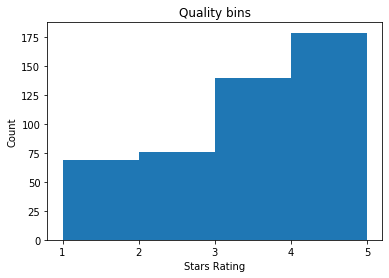

In [285]:
%matplotlib inline

bins =np.linspace(min(milano_hotels_df["Classificazione"]), max(milano_hotels_df["Classificazione"]), 5)
plt.pyplot.hist(milano_hotels_df["Classificazione"],bins)

# set x/y labels and plot title
plt.pyplot.xlabel("Stars Rating")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Quality bins")
plt.pyplot.xticks(ticks=bins)

In [84]:
data_hotels=milano_hotels_df[(milano_hotels_df['Classificazione']>=2) & (milano_hotels_df['Classificazione']<=4)]
data_hotels.dropna(inplace=True)
data_hotels= data_hotels.reset_index(drop=True)
data_hotels.head()


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Comune,Provincia,Denominazione struttura,Categoria,Classificazione,Indirizzo,CAP,Camere,Suite,Letti,...,Vicino aereoporto,Zona centrale,Vicino impianto risalita,Zona periferica,Zona stazione FS,Attrezzature,Attrezzature sportive,Attrezzature congressi,Longitudine,Latitudine
0,MILANO,CITTA' METROPOLITANA DI MILANO,AC MILANO,Hotel,4,VIA ENRICO TAZZOLI 2,20154,158,2,303,...,No,Si,No,No,Si,"Ascensore,Ristorante,Bar,Sala lettura separata...",Fitness/centro salute,"Numero sale congressi 4,Congressi capacita' Mi...",9.183956,45.485047
1,MILANO,CITTA' METROPOLITANA DI MILANO,ALGA,Hotel,3,VIA DEL MARE 93,20142,87,3,174,...,No,No,No,No,No,"Ascensore,Ristorante,Bar,Sala lettura separata...","Campo da golf,Pattinaggio su ghiaccio,Fitness/...","Numero sale congressi 6,Congressi capacita' Mi...",9.157344,45.419201
2,MILANO,CITTA' METROPOLITANA DI MILANO,ANTARES HOTEL ACCADEMIA,Hotel,4,VIALE CERTOSA 68,20155,66,3,116,...,No,No,No,No,Si,"Ascensore,Ristorante,Ristorante vegetariano,Ta...",Fitness/centro salute,"Numero sale congressi 1,Congressi capacita' Mi...",9.147505,45.492051
3,MILANO,CITTA' METROPOLITANA DI MILANO,ANTARES HOTEL RUBENS,Hotel,4,VIA RUBENS 21,20148,87,9,147,...,No,No,No,No,No,"Ascensore,Bar,Sala televisione separata,Accett...",Fitness/centro salute,"Numero sale congressi 2,Congressi capacita' Mi...",9.142114,45.467358
4,MILANO,CITTA' METROPOLITANA DI MILANO,BARCELO' MILAN,Hotel,4,VIA GIORGIO STEPHENSON 55,20157,280,0,560,...,No,No,No,No,Si,"Ascensore,Ristorante,Ristorante vegetariano,Ba...","Fitness/centro salute,Piscina coperta","Numero sale congressi 7,Congressi capacita' Mi...",9.127263,45.510445


In [85]:
data_stations=pd.read_csv('milano_stations.csv',index_col=0)
data_stations.dropna(inplace=True)
data_stations = data_stations.reset_index(drop=True)
data_stations.head(10)

,Stazione,Città,Municipio,Latitude,Longitude
0,Abbiategrasso,Milano,Municipio 5,45.397550,8.920110
1,Affori Centro,Milano,Municipio 9,45.579173,9.156239
2,Affori FN,Milano,Municipio 9,45.579173,9.156239
3,Amendola,Milano,Municipio 8,45.579173,9.156239
4,Bande Nere,Milano,Municipio 6,45.484210,9.201110
5,Bicocca,Milano,Municipio 9,45.452610,9.117040
6,Bignami,Milano,Municipio 9,45.484210,9.201110
7,Bisceglie,Milano,Municipio 6,45.484210,9.201110
8,Bonola,Milano,Municipio 8,45.579173,9.156239
9,Brenta,Milano,Municipio 4,45.579173,9.156239


In [7]:
from geopy.distance import geodesic

In [86]:
distancematrix=np.zeros((data_hotels.shape[0],data_stations.shape[0]))
for i in range(len(data_hotels)):
    for j in range(len(data_stations)):
        p1=(data_hotels.loc[i,'Latitudine'],data_hotels.loc[i,'Longitudine'])
        p2=(data_stations.loc[j,'Latitude'],data_stations.loc[j,'Longitude'])
        distancematrix[i,j]=geodesic(p1,p2).kilometers
        
        
        

In [107]:
distance_df=pd.DataFrame(distancematrix,columns = data_stations['Stazione'],index = data_hotels['Denominazione struttura'])
distance_df.head()

Stazione,Abbiategrasso,Affori Centro,Affori FN,Amendola,Bande Nere,Bicocca,Bignami,Bisceglie,Bonola,Brenta,...,Precotto,Primaticcio,QT8,Repubblica,Rogoredo FS,Romolo,Rovereto,San Babila,San Donato,San Leonardo
Denominazione struttura,,,,,,,,,,,,,,,,,,,,,
AC MILANO,22.818898,10.683155,10.683155,10.683155,1.344289,6.354508,1.344289,1.344289,10.683155,10.683155,...,25.445676,1.344289,1.344289,10.683155,3.133482,1.344289,1.344289,24.003514,1.344289,1.344289
ALGA,18.727051,17.779802,17.779802,17.779802,7.995231,4.871638,7.995231,7.995231,17.779802,17.779802,...,22.757100,7.995231,7.995231,17.779802,9.768352,7.995231,7.995231,21.355894,7.995231,7.995231
ANTARES HOTEL ACCADEMIA,20.659064,9.706987,9.706987,9.706987,4.280227,4.988995,4.280227,4.280227,9.706987,9.706987,...,22.889401,4.280227,4.280227,9.706987,5.806923,4.280227,4.280227,21.455678,4.280227,4.280227
ANTARES HOTEL RUBENS,19.025943,12.476249,12.476249,12.476249,4.978673,2.555954,4.978673,4.978673,12.476249,12.476249,...,21.845435,4.978673,4.978673,12.476249,6.916679,4.978673,4.978673,20.400669,4.978673,4.978673
BARCELO' MILAN,20.493847,7.966737,7.966737,7.966737,6.466727,6.477395,6.466727,6.466727,7.966737,7.966737,...,22.090231,6.466727,6.466727,7.966737,7.590732,6.466727,6.466727,20.685848,6.466727,6.466727


In [91]:
print(distance_df.shape)

(46, 72)


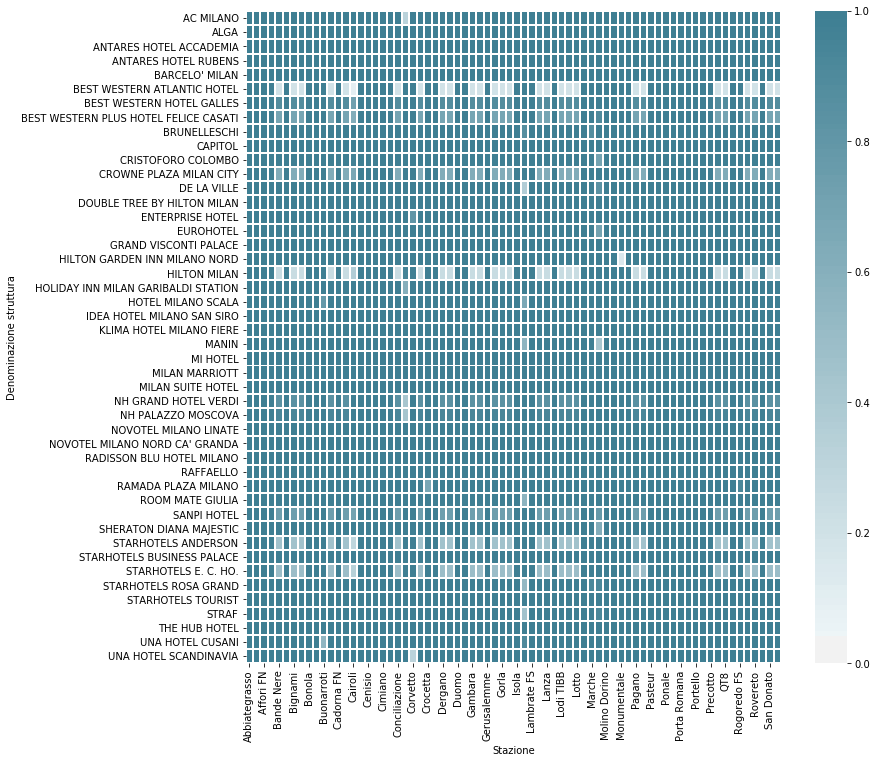

In [293]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.heatmap(
    distance_df,
    vmin=0,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    linewidth=1
)

In [216]:
min_distance = distance_df.min(axis=1)
min_distance_IndexObj = distance_df.idxmin(axis=1)
nearby_stations_df=pd.DataFrame([min_distance_IndexObj.index, min_distance_IndexObj.values, min_distance.values])
nearby_stations_df=nearby_stations_df.transpose()
nearby_stations_df.columns =['Name','Nearby Station','Distance']
nearby_stations_df.head()


,Name,Nearby Station,Distance
0,AC MILANO,Cordusio,0.316469
1,ALGA,Moscova,4.44708
2,ANTARES HOTEL ACCADEMIA,Corvetto,1.78104
3,ANTARES HOTEL RUBENS,Moscova,1.55387
4,BARCELO' MILAN,Famagosta,2.13185


In [218]:
nearby_stations_df=nearby_stations_df[nearby_stations_df['Distance']<=1.0]
nearby_stations_df.reset_index(drop=True,inplace=True)
#del nearby_stations_df['index']
nearby_stations_df.head()

,Name,Nearby Station,Distance
0,AC MILANO,Cordusio,0.316469
1,BEST WESTERN ATLANTIC HOTEL,Cairoli,0.0918505
2,BEST WESTERN HOTEL GALLES,Cairoli,0.730175
3,BEST WESTERN PLUS HOTEL FELICE CASATI,Cairoli,0.623737
4,BRUNELLESCHI,Istria,0.864206


In [219]:
nearby_stations_df.shape

(27, 3)

In [220]:
for index,row in nearby_stations_df.iterrows():
    Denominazione_Struttura=row['Name']
    nearby_stations_df.loc[index,'Latitude']=data_hotels[data_hotels['Denominazione struttura'] == Denominazione_Struttura]['Latitudine'].values
    nearby_stations_df.loc[index,'Longitude']=data_hotels[data_hotels['Denominazione struttura'] == Denominazione_Struttura]['Longitudine'].values
    
    

In [221]:
nearby_stations_df.shape

(27, 5)

In [222]:
nearby_stations_df.head()

,Name,Nearby Station,Distance,Latitude,Longitude
0,AC MILANO,Cordusio,0.316469,45.485047,9.183956
1,BEST WESTERN ATLANTIC HOTEL,Cairoli,0.0918505,45.483196,9.203135
2,BEST WESTERN HOTEL GALLES,Cairoli,0.730175,45.480217,9.210845
3,BEST WESTERN PLUS HOTEL FELICE CASATI,Cairoli,0.623737,45.478452,9.204229
4,BRUNELLESCHI,Istria,0.864206,45.461090,9.191421


In [223]:
for index,row in data_stations.iterrows():
    Stazione=row['Stazione']
    nearby_stations_df.loc[index,'Borough']=data_stations[data_stations['Stazione'] == Stazione]['Municipio'].values

In [224]:
nearby_stations_df.head()

,Name,Nearby Station,Distance,Latitude,Longitude,Borough
0,AC MILANO,Cordusio,0.316469,45.485047,9.183956,Municipio 5
1,BEST WESTERN ATLANTIC HOTEL,Cairoli,0.0918505,45.483196,9.203135,Municipio 9
2,BEST WESTERN HOTEL GALLES,Cairoli,0.730175,45.480217,9.210845,Municipio 9
3,BEST WESTERN PLUS HOTEL FELICE CASATI,Cairoli,0.623737,45.478452,9.204229,Municipio 8
4,BRUNELLESCHI,Istria,0.864206,45.461090,9.191421,Municipio 6


In [234]:
milan_data=nearby_stations_df
milan_data.dropna(inplace=True)
print(milan_data.shape)

(27, 6)


### Define Foursquare Credentials and Version

In [209]:
CLIENT_ID = 'A31DKR0NYBOVDY1GLEYILSYSI1GR0JDIHJBFBVUVXCACQPAQ' # your Foursquare ID
CLIENT_SECRET = 'KPOIMSVG5FRBSLL5BWILBSEFSOUJSXFAW2HWFAI4FHLCJBQA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A31DKR0NYBOVDY1GLEYILSYSI1GR0JDIHJBFBVUVXCACQPAQ
CLIENT_SECRET:KPOIMSVG5FRBSLL5BWILBSEFSOUJSXFAW2HWFAI4FHLCJBQA


In [210]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        LIMIT=100
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [235]:
milan_venues = getNearbyVenues(names=milan_data['Name'], 
                                   latitudes=milan_data['Latitude'], 
                                   longitudes=milan_data['Longitude'], 
                                   radius=500)

AC MILANO
BEST WESTERN ATLANTIC HOTEL
BEST WESTERN HOTEL GALLES
BEST WESTERN PLUS HOTEL FELICE CASATI
BRUNELLESCHI
CRISTOFORO COLOMBO
CROWNE PLAZA MILAN CITY
DE LA VILLE
ENTERPRISE HOTEL
EUROHOTEL
HILTON GARDEN INN MILANO NORD
HILTON MILAN
HOLIDAY INN MILAN GARIBALDI STATION
HOTEL MILANO SCALA
MANIN
NH GRAND HOTEL VERDI
NH PALAZZO MOSCOVA
RAMADA PLAZA MILANO
ROOM MATE GIULIA
SANPI HOTEL
SHERATON DIANA MAJESTIC
STARHOTELS ANDERSON
STARHOTELS E. C. HO.
STARHOTELS ROSA GRAND
STRAF
UNA HOTEL CUSANI
UNA HOTEL SCANDINAVIA


In [236]:
print(milan_venues.shape)
milan_venues.head()

(2267, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AC MILANO,45.485047,9.183956,Osteria dei Vecchi Sapori,45.486403,9.186558,Italian Restaurant
1,AC MILANO,45.485047,9.183956,Ceresio 7 Pools & Restaurant,45.484025,9.179849,Italian Restaurant
2,AC MILANO,45.485047,9.183956,La Griglia di Varrone,45.482685,9.186148,Steakhouse
3,AC MILANO,45.485047,9.183956,Pizzeria da Martino,45.483547,9.181679,Pizza Place
4,AC MILANO,45.485047,9.183956,Trattoria Ferrelli,45.483271,9.181600,Trattoria/Osteria


### Venues returned for each Neighborhood Location

In [237]:
milan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AC MILANO,61,61,61,61,61,61
BEST WESTERN ATLANTIC HOTEL,100,100,100,100,100,100
BEST WESTERN HOTEL GALLES,97,97,97,97,97,97
BEST WESTERN PLUS HOTEL FELICE CASATI,100,100,100,100,100,100
BRUNELLESCHI,100,100,100,100,100,100
CRISTOFORO COLOMBO,100,100,100,100,100,100
CROWNE PLAZA MILAN CITY,60,60,60,60,60,60
DE LA VILLE,100,100,100,100,100,100
ENTERPRISE HOTEL,34,34,34,34,34,34


In [238]:
print('There are {} uniques categories.'.format(len(milan_venues['Venue Category'].unique())))

There are 180 uniques categories.


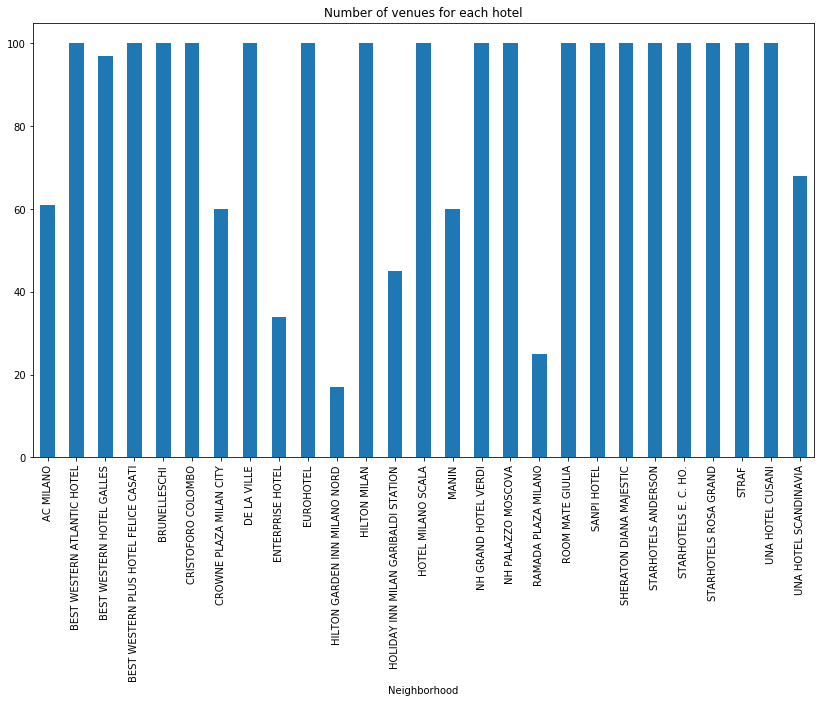

In [297]:
ax = milan_venues.groupby('Neighborhood')['Venue'].count().plot.bar(title="Number of venues for each hotel", figsize=(14,8))

### Analyzing each Neighborhood Location

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. 

In [239]:
# one hot encoding
milan_onehot = pd.get_dummies(milan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
milan_onehot['Neighborhood'] = milan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [milan_onehot.columns[-1]] + list(milan_onehot.columns[:-1])
milan_onehot = milan_onehot[fixed_columns]

milan_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Women's Store
0,AC MILANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AC MILANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AC MILANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AC MILANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AC MILANO,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [240]:
milan_grouped = milan_onehot.groupby('Neighborhood').mean().reset_index()
milan_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Women's Store
0,AC MILANO,0.000000,0.00,0.016393,0.00,0.016393,0.000000,0.00,0.016393,0.00,...,0.000000,0.00,0.016393,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
1,BEST WESTERN ATLANTIC HOTEL,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.010000,0.00,...,0.000000,0.01,0.000000,0.000000,0.01,0.000000,0.00,0.000000,0.00,0.000000
2,BEST WESTERN HOTEL GALLES,0.000000,0.00,0.000000,0.00,0.000000,0.010309,0.00,0.010309,0.00,...,0.000000,0.00,0.010309,0.010309,0.00,0.020619,0.00,0.010309,0.00,0.000000
3,BEST WESTERN PLUS HOTEL FELICE CASATI,0.000000,0.01,0.000000,0.00,0.020000,0.000000,0.00,0.000000,0.00,...,0.000000,0.00,0.010000,0.000000,0.01,0.030000,0.00,0.020000,0.01,0.000000
4,BRUNELLESCHI,0.010000,0.00,0.010000,0.00,0.010000,0.010000,0.00,0.010000,0.00,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.020000,0.00,0.010000
5,CRISTOFORO COLOMBO,0.000000,0.02,0.000000,0.01,0.020000,0.000000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.02,0.050000,0.01,0.010000,0.01,0.000000
6,CROWNE PLAZA MILAN CITY,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.016667,0.00,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
7,DE LA VILLE,0.000000,0.00,0.000000,0.00,0.020000,0.020000,0.00,0.010000,0.00,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.020000,0.00,0.030000
8,ENTERPRISE HOTEL,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
9,EUROHOTEL,0.000000,0.01,0.000000,0.01,0.020000,0.000000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.01,0.040000,0.00,0.010000,0.01,0.000000


### Top 5 most common venues for each Neighborhood

In [241]:
num_top_venues = 5

for hood in milan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = milan_grouped[milan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AC MILANO----
                 venue  freq
0   Italian Restaurant  0.15
1          Pizza Place  0.07
2                 Café  0.07
3  Japanese Restaurant  0.05
4           Restaurant  0.05


----BEST WESTERN ATLANTIC HOTEL----
                venue  freq
0  Italian Restaurant  0.18
1               Hotel  0.13
2                Café  0.13
3         Pizza Place  0.05
4      Sandwich Place  0.05


----BEST WESTERN HOTEL GALLES----
                venue  freq
0         Pizza Place  0.09
1  Italian Restaurant  0.08
2                Café  0.05
3               Hotel  0.05
4      Ice Cream Shop  0.05


----BEST WESTERN PLUS HOTEL FELICE CASATI----
                venue  freq
0  Italian Restaurant  0.11
1         Pizza Place  0.08
2                Café  0.07
3               Hotel  0.07
4        Cocktail Bar  0.05


----BRUNELLESCHI----
                venue  freq
0               Hotel  0.10
1  Italian Restaurant  0.09
2         Pizza Place  0.06
3      Ice Cream Shop  0.04
4                Ca

### Put in the Dataframe

In [242]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create the new dataframe and display the top 10 venues for each neighborhood.

In [245]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = milan_grouped['Neighborhood']

for ind in np.arange(milan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(milan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AC MILANO,Italian Restaurant,Pizza Place,Café,Restaurant,Cocktail Bar,Japanese Restaurant,Bistro,Bakery,Bookstore,Plaza
1,BEST WESTERN ATLANTIC HOTEL,Italian Restaurant,Hotel,Café,Sandwich Place,Pizza Place,Ice Cream Shop,Japanese Restaurant,Chinese Restaurant,Cocktail Bar,Bistro
2,BEST WESTERN HOTEL GALLES,Pizza Place,Italian Restaurant,Ice Cream Shop,Hotel,Café,Cocktail Bar,Sandwich Place,Bakery,Japanese Restaurant,Vegetarian / Vegan Restaurant
3,BEST WESTERN PLUS HOTEL FELICE CASATI,Italian Restaurant,Pizza Place,Hotel,Café,Cocktail Bar,Ice Cream Shop,Bar,Clothing Store,Vegetarian / Vegan Restaurant,Seafood Restaurant
4,BRUNELLESCHI,Hotel,Italian Restaurant,Pizza Place,Ice Cream Shop,Café,Burger Joint,Gourmet Shop,Dessert Shop,Plaza,Cocktail Bar


### Clustering Neighborhoods

In [248]:
kclusters = 6

milan_grouped_clustering = milan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([5, 0, 1, 1, 1, 1, 0, 2, 5, 1])

In [250]:
from sklearn import metrics
from scipy.spatial.distance import cdist

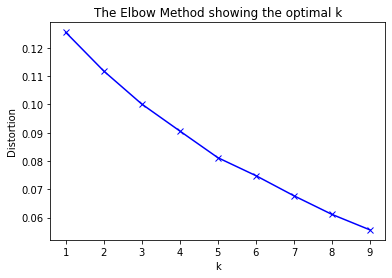

In [251]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(milan_grouped_clustering)
    kmeanModel.fit(milan_grouped_clustering)
    distortions.append(sum(np.min(cdist(milan_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / milan_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Run k-means to cluster the neighborhood into 5 clusters.

In [253]:
# set number of clusters
kclusters = 5

milan_grouped_clustering = milan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(milan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 2, 1, 0, 2, 1, 1])

In [259]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

milan_merged = milan_data
milan_merged.columns=['Neighborhood', 'Nearby Station','DistanceTo','Latitude','Longitude','Borough']

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
milan_merged = milan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

milan_merged['Cluster Labels']= milan_merged['Cluster Labels'].fillna(0)
milan_merged['Cluster Labels']= milan_merged['Cluster Labels'].astype(int)
milan_merged.head(10) # check the last columns!

,Neighborhood,Nearby Station,DistanceTo,Latitude,Longitude,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AC MILANO,Cordusio,0.316469,45.485047,9.183956,Municipio 5,1,Italian Restaurant,Pizza Place,Café,Restaurant,Cocktail Bar,Japanese Restaurant,Bistro,Bakery,Bookstore,Plaza
1,BEST WESTERN ATLANTIC HOTEL,Cairoli,0.0918505,45.483196,9.203135,Municipio 9,0,Italian Restaurant,Hotel,Café,Sandwich Place,Pizza Place,Ice Cream Shop,Japanese Restaurant,Chinese Restaurant,Cocktail Bar,Bistro
2,BEST WESTERN HOTEL GALLES,Cairoli,0.730175,45.480217,9.210845,Municipio 9,1,Pizza Place,Italian Restaurant,Ice Cream Shop,Hotel,Café,Cocktail Bar,Sandwich Place,Bakery,Japanese Restaurant,Vegetarian / Vegan Restaurant
3,BEST WESTERN PLUS HOTEL FELICE CASATI,Cairoli,0.623737,45.478452,9.204229,Municipio 8,1,Italian Restaurant,Pizza Place,Hotel,Café,Cocktail Bar,Ice Cream Shop,Bar,Clothing Store,Vegetarian / Vegan Restaurant,Seafood Restaurant
4,BRUNELLESCHI,Istria,0.864206,45.461090,9.191421,Municipio 6,2,Hotel,Italian Restaurant,Pizza Place,Ice Cream Shop,Café,Burger Joint,Gourmet Shop,Dessert Shop,Plaza,Cocktail Bar
5,CRISTOFORO COLOMBO,Missori,0.706305,45.475525,9.206123,Municipio 9,1,Italian Restaurant,Café,Pizza Place,Vegetarian / Vegan Restaurant,Hotel,Seafood Restaurant,Clothing Store,Bakery,Ice Cream Shop,Bistro
6,CROWNE PLAZA MILAN CITY,Bande Nere,0.633605,45.489908,9.201365,Municipio 9,0,Italian Restaurant,Café,Hotel,Pizza Place,Bistro,Sandwich Place,Restaurant,Sushi Restaurant,Breakfast Spot,Gym / Fitness Center
7,DE LA VILLE,Istria,0.364456,45.465941,9.191963,Municipio 6,2,Italian Restaurant,Boutique,Plaza,Hotel,Clothing Store,Cocktail Bar,Ice Cream Shop,Women's Store,Dessert Shop,Monument / Landmark
8,ENTERPRISE HOTEL,Corvetto,0.811804,45.486774,9.157535,Municipio 8,1,Italian Restaurant,Restaurant,Hotel,Basketball Court,Seafood Restaurant,Health Food Store,Mexican Restaurant,Diner,Nightclub,Park
9,EUROHOTEL,Missori,0.710742,45.474205,9.207658,Municipio 4,1,Italian Restaurant,Pizza Place,Café,Vegetarian / Vegan Restaurant,Hotel,Seafood Restaurant,Bakery,Gay Bar,Bistro,Comic Shop


# 4. Results section: 

## Discussion of the results and how they help to take a decision.

### Let's visualize the resulting clusters

In [261]:
address = 'Milano'

geolocator = Nominatim(user_agent="milan_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Milano are 45.4668, 9.1905.


In [265]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(milan_merged['Latitude'], milan_merged['Longitude'], milan_merged['Neighborhood'], milan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)
map_clusters.save('map_of_Milan_hotels_clusters.html')

### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 1

In [278]:
milan_merged.loc[milan_merged['Cluster Labels'] == 0, milan_merged.columns[[0,1] + list(range(5, milan_merged.shape[1]))]]

,Neighborhood,Nearby Station,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,BEST WESTERN ATLANTIC HOTEL,Cairoli,Municipio 9,0,Italian Restaurant,Hotel,Café,Sandwich Place,Pizza Place,Ice Cream Shop,Japanese Restaurant,Chinese Restaurant,Cocktail Bar,Bistro
6,CROWNE PLAZA MILAN CITY,Bande Nere,Municipio 9,0,Italian Restaurant,Café,Hotel,Pizza Place,Bistro,Sandwich Place,Restaurant,Sushi Restaurant,Breakfast Spot,Gym / Fitness Center
11,HILTON MILAN,Bande Nere,Municipio 9,0,Italian Restaurant,Hotel,Café,Pizza Place,Restaurant,Sandwich Place,Japanese Restaurant,Ice Cream Shop,Sushi Restaurant,Chinese Restaurant
21,STARHOTELS ANDERSON,Cairoli,Municipio 1,0,Hotel,Café,Italian Restaurant,Pizza Place,Ice Cream Shop,Sandwich Place,Restaurant,Chinese Restaurant,Bistro,Indian Restaurant
22,STARHOTELS E. C. HO.,Cairoli,Municipio 4,0,Hotel,Café,Italian Restaurant,Pizza Place,Ice Cream Shop,Bistro,Sandwich Place,Restaurant,Indian Restaurant,Bookstore


#### Cluster 2

In [279]:
milan_merged.loc[milan_merged['Cluster Labels'] == 1, milan_merged.columns[[0,1] + list(range(5, milan_merged.shape[1]))]]

,Neighborhood,Nearby Station,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AC MILANO,Cordusio,Municipio 5,1,Italian Restaurant,Pizza Place,Café,Restaurant,Cocktail Bar,Japanese Restaurant,Bistro,Bakery,Bookstore,Plaza
2,BEST WESTERN HOTEL GALLES,Cairoli,Municipio 9,1,Pizza Place,Italian Restaurant,Ice Cream Shop,Hotel,Café,Cocktail Bar,Sandwich Place,Bakery,Japanese Restaurant,Vegetarian / Vegan Restaurant
3,BEST WESTERN PLUS HOTEL FELICE CASATI,Cairoli,Municipio 8,1,Italian Restaurant,Pizza Place,Hotel,Café,Cocktail Bar,Ice Cream Shop,Bar,Clothing Store,Vegetarian / Vegan Restaurant,Seafood Restaurant
5,CRISTOFORO COLOMBO,Missori,Municipio 9,1,Italian Restaurant,Café,Pizza Place,Vegetarian / Vegan Restaurant,Hotel,Seafood Restaurant,Clothing Store,Bakery,Ice Cream Shop,Bistro
8,ENTERPRISE HOTEL,Corvetto,Municipio 8,1,Italian Restaurant,Restaurant,Hotel,Basketball Court,Seafood Restaurant,Health Food Store,Mexican Restaurant,Diner,Nightclub,Park
9,EUROHOTEL,Missori,Municipio 4,1,Italian Restaurant,Pizza Place,Café,Vegetarian / Vegan Restaurant,Hotel,Seafood Restaurant,Bakery,Gay Bar,Bistro,Comic Shop
12,HOLIDAY INN MILAN GARIBALDI STATION,Cordusio,Municipio 1,1,Italian Restaurant,Café,Pub,Ice Cream Shop,Seafood Restaurant,Cocktail Bar,Pizza Place,Ramen Restaurant,Bakery,Japanese Restaurant
15,NH GRAND HOTEL VERDI,Cordusio,Municipio 3,1,Italian Restaurant,Restaurant,Pizza Place,Hotel,Cocktail Bar,Ice Cream Shop,Plaza,Steakhouse,Piadineria,Seafood Restaurant
16,NH PALAZZO MOSCOVA,Cordusio,Municipio 8,1,Italian Restaurant,Restaurant,Pizza Place,Ice Cream Shop,Cocktail Bar,Café,Hotel,Bookstore,Plaza,Seafood Restaurant
19,SANPI HOTEL,Cairoli,Municipio 9,1,Italian Restaurant,Café,Hotel,Pizza Place,Cocktail Bar,Clothing Store,Ice Cream Shop,Bar,Vegetarian / Vegan Restaurant,Art Gallery


#### Cluster 3

In [280]:
milan_merged.loc[milan_merged['Cluster Labels'] == 2, milan_merged.columns[[0,1] + list(range(5, milan_merged.shape[1]))]]

,Neighborhood,Nearby Station,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,BRUNELLESCHI,Istria,Municipio 6,2,Hotel,Italian Restaurant,Pizza Place,Ice Cream Shop,Café,Burger Joint,Gourmet Shop,Dessert Shop,Plaza,Cocktail Bar
7,DE LA VILLE,Istria,Municipio 6,2,Italian Restaurant,Boutique,Plaza,Hotel,Clothing Store,Cocktail Bar,Ice Cream Shop,Women's Store,Dessert Shop,Monument / Landmark
13,HOTEL MILANO SCALA,Istria,Municipio 2,2,Italian Restaurant,Plaza,Hotel,Ice Cream Shop,Theater,Monument / Landmark,Café,Restaurant,Art Museum,Gift Shop
14,MANIN,Missori,Municipio 1,2,Boutique,Hotel,Italian Restaurant,Café,Plaza,Park,Clothing Store,Women's Store,Men's Store,Gym
18,ROOM MATE GIULIA,Istria,Municipio 3,2,Italian Restaurant,Pizza Place,Ice Cream Shop,Hotel,Plaza,Cocktail Bar,Café,Gourmet Shop,Monument / Landmark,Coffee Shop
23,STARHOTELS ROSA GRAND,Istria,Municipio 3,2,Italian Restaurant,Hotel,Clothing Store,Plaza,Boutique,Cocktail Bar,Pizza Place,Ice Cream Shop,Bookstore,Coffee Shop
24,STRAF,Istria,Municipio 1,2,Italian Restaurant,Plaza,Hotel,Ice Cream Shop,Clothing Store,Pizza Place,Cocktail Bar,Sandwich Place,Café,Bakery


#### Cluster 4

In [281]:
milan_merged.loc[milan_merged['Cluster Labels'] == 3, milan_merged.columns[[0,1] + list(range(5, milan_merged.shape[1]))]]

,Neighborhood,Nearby Station,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,RAMADA PLAZA MILANO,Crocetta,Municipio 2,3,Italian Restaurant,Pizza Place,Sandwich Place,Park,Pool,Event Space,Spa,Café,Music Venue,Chinese Restaurant


#### Cluster 5

In [282]:
milan_merged.loc[milan_merged['Cluster Labels'] == 4, milan_merged.columns[[0,1] + list(range(5, milan_merged.shape[1]))]]

,Neighborhood,Nearby Station,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,HILTON GARDEN INN MILANO NORD,Monumentale,Municipio 7,4,Italian Restaurant,Theater,Restaurant,Office,Hotel,Cosmetics Shop,Pizza Place,Ice Cream Shop,Snack Place,Climbing Gym


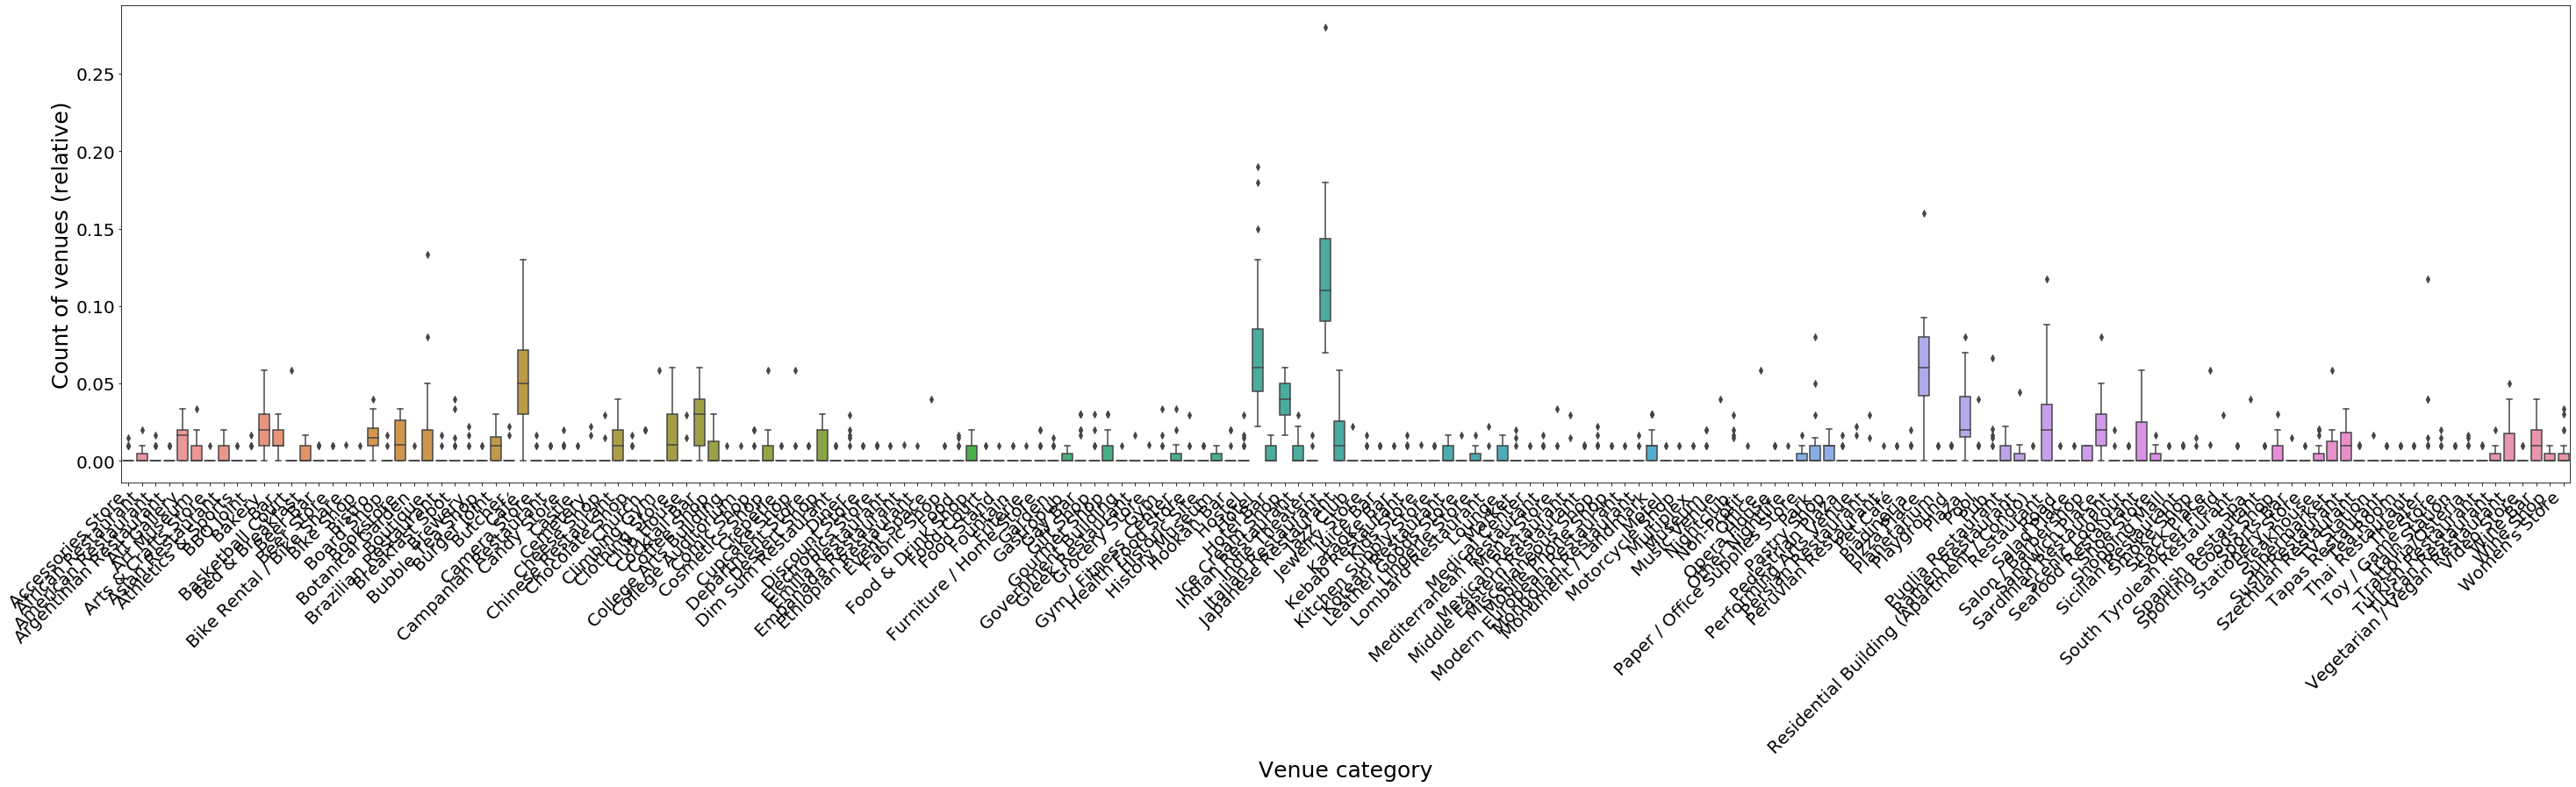

In [317]:
plt.figure(figsize=(50, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = milan_grouped)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

# 5. Discussion section:   
## Elaboration and discussion on any observations and/or recommendations for improvement.

The analysis shows that although there is a great number of high quality hotels in milan, there are pockets of 2-4 star rating hotels fairly close to subway stations. In first cluster, highest concentration of such hotels was detected in Municipio (Borough) 9, with italian restaurant as the 1st most common venue, and Café and Pizza Place as the next commom venues. Although these hotels are far from city center, but they are fairly close to subway stations which allow easy transport. Moreover, they can provide 625 rooms to accommodate all IF+OCOG Stakeholder Group of Winter Games 2026. Another cluster was identified as potentially interesting (cluster 1), which are distributed around the boroughs 1, 3, 4, 7, 8, 9, and have enough capacity to accommodate the mentioned group. Also this cluster are far from city center, but are fairly close to subway stations to allow easy transportation.
Hotels clustered in Cluster 2, are closer to city center and distributed around boroughs 1, 2, 3 and 6. Obviously, these are closer to monuments-landmarks in Milan and the places worthable to visit. 
Recommended clusters should  be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.
Results are containing largest number of potential hotel locations based on distance to subway station and number of existing venues around them. This, of course, does not imply that those are actually optimal locations to accommodate all IF+OCOG Stakeholder Group of Winter Games 2026!  This analysis provide a proposed list of hotels. To submit the plan for accommodation,  more accommodation requirements should be covered according to IOC Host City Contract. The IOC will choose, after an inspection visit, one or several hotels to become the OFH, thus covering its accommodation requirements.  

# 6. Conclusion section: 

Purpose of this project was to identify Milan Hotels close to a subway station with most venues and ammenities in their neighborhoods (particularly Italian restaurants) in order to aid IOC administration in narrowing down the search for optimal location for accommodating all IF+OCOG Stakeholder Group of Winter Games 2026. I have first identified hotels that satisfy some basic requirements, then by finding closest subway station to each hotel using Nominatim API, venues density distribution from Foursquare data, I generated extensive collection of location that justify further analysis. Clustering of those locations was then performed in order to create major locations of interest (containing greatest number of potential locations) and name and addresses of those hotels were created to be used as starting points for final exploration by IOC stakeholders.

Final decission on optimal restaurant location will be made by IOC stakeholders based on more accommodation requirements which should be covered according to IOC Host City Contract.